# DATA MINING PROJECT: Analysis of a Supermarket’s Customers
## 2.1) Clustering Analysis
### *Antonio Strippoli, Valerio Mariani*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from math import log, ceil
from natsort import natsorted
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from itertools import combinations

pd.set_option('mode.chained_assignment', None)

In [7]:
cdf = pd.read_csv("customer_profilation.csv", index_col=0)

In [ ]:
def cluster_score(X, k):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=1000)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_

    # Values
    inertia = -1* kmeans.inertia_
    sil = silhouette_score(X, kmeans.labels_) * 100
    separation = metrics.davies_bouldin_score(X, kmeans.labels_) * 100

    return inertia + sil + separation

In [23]:
cdf = pd.read_csv("customer_profilation.csv", index_col=0)

combos = list(combinations(cdf.columns.array, 3))

cdf.drop(columns=['PrefItem', 'MainCountry'], inplace=True)

score = -100000
best = []
best_k = 0
for combo in combos:
    new_cdf = cdf[list(combo)]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(new_cdf.values)
    
    for k in range(3, 10):
        new_score = cluster_score(X, k)
        if new_score > score:
            score = new_score
            best = list(combo)
            best_k = k

print(best)
print(best_k)
print(score)

[[3.88084219e-02 5.69764497e-02 4.47398696e-02 ... 4.04545455e-01
  0.00000000e+00 8.20377358e-04]
 [3.69604018e-02 1.05765173e-01 7.46516682e-02 ... 2.51515152e-01
  0.00000000e+00 3.40758129e-04]
 [9.95087741e-03 5.31780198e-02 8.05317653e-02 ... 0.00000000e+00
  0.00000000e+00 1.32794024e-03]
 ...
 [1.61109444e-03 6.24630708e-03 6.39140995e-03 ... 1.27272727e-01
  4.85000000e-02 8.08170204e-04]
 [2.20498807e-02 2.11023888e-02 1.09932251e-02 ... 5.53030303e-01
  0.00000000e+00 6.95487979e-04]
 [2.50351440e-02 8.34810501e-02 6.73654608e-02 ... 1.83333333e-01
  0.00000000e+00 5.29186454e-04]]


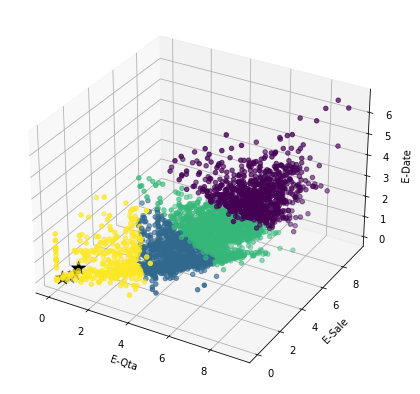

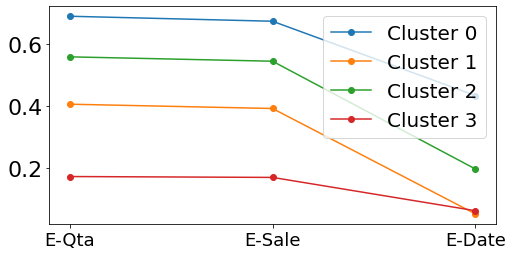

"\nsn.heatmap(cdf.drop('CustomerID', axis=1).corr(), annot=True)\nplt.show()\nplt.close()\n\npd.plotting.scatter_matrix(cdf,figsize=(15,15))\nplt.show()\nplt.close()\n"

In [3]:
# Reimpostazione dataframe
# cdf = cdf[cdf['MainCountry'] == 'United Kingdom']
attr_cluster = ['E-Qta','E-Sale','E-Date']
cdf = cdf[attr_cluster]
# cdf['MainCountry'] = pd.factorize(cdf['MainCountry'])[0]
# cdf['PrefItem'] = pd.factorize(cdf['PrefItem'])[0]

# normalizzazione (prova a denormalizzare)
scaler = MinMaxScaler() # Minmax?
X = scaler.fit_transform(cdf.values)

#selezionare miglior valore di k
"""
sse_list = list()
max_k = 30
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

plt.plot(range(2, len(sse_list) + 2), sse_list, marker='o')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.show()
"""

# clusterizzazione
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=1000)
kmeans.fit(X)
centers = kmeans.cluster_centers_

# grafico 2D
"""
plt.scatter(cdf['E'], cdf['SaleRate'], c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
plt.show()
quit()
"""

combos = list(combinations(attr_cluster, 3))

for c in combos:
    c1, c2, c3 = c

    # Grafico 3D
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(cdf[c1], cdf[c2], cdf[c3], c=kmeans.labels_, s=20)
    ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], s=200, marker='*', c='k')
    ax.set_xlabel(c1)
    ax.set_ylabel(c2)
    ax.set_zlabel(c3)
    plt.show()


"""
from math import pi

# number of variable
N = len(cdf.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], cdf.columns, color='grey', size=8) 
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.show()
"""

plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(cdf.columns)), cdf.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()
"""
sn.heatmap(cdf.drop('CustomerID', axis=1).corr(), annot=True)
plt.show()
plt.close()

pd.plotting.scatter_matrix(cdf,figsize=(15,15))
plt.show()
plt.close()
"""